# pandas简介
by Maxwell Margenot

 Quantopian课程系列的一部分:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)



panda是一个Python库，它提供了一组强大的数据结构，可以更好地帮助您管理数据。在这一讲中，我们将介绍如何使用`Series`和`DataFrame`对象来处理数据。这些对象与NumPy有很强的集成，在[系列讲座](http://www.quantopian.com/lectures# introduction to-NumPy)的其他部分有介绍，这使我们能够轻松地进行金融所需的统计和数学计算。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

使用pandas，可以很容易地存储、可视化和执行数据计算。只需几行代码，我们就可以修改数据并以一种容易理解的方式将其表示出来。在这里，我们模拟NumPy中的一些返回，将它们放入pandas`DataFrame`中，然后执行计算，将它们转换为价格并绘制它们，所有这些都只使用几行代码。

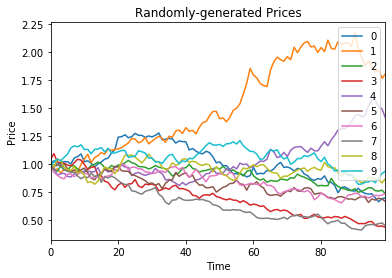

In [2]:
returns = pd.DataFrame(np.random.normal(1.0, 0.03, (100, 10)))
prices = returns.cumprod()
prices.plot()
plt.title('Randomly-generated Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=0);

所以让我们来看看我们是如何做到这一点的!

## pandas数据结构

### `Series`

pandas`Series`是一个一维数组，其标签可以包含任何数据类型。我们主要使用它们来处理时间序列数据。创建`Series`与在Python列表或NumPy数组中调用`pandas.Series()`一样简单。

In [3]:
s = pd.Series([1, 2, np.nan, 4, 5])
print (s)

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64


每个`Series`都有一个名字。我们可以将Series的名称作为参数，也可以在以后通过直接访问name属性来定义它。在本例中，时间序列没有名称，因此属性应该为空。

In [4]:
print (s.name)

None


这个名称可以直接修改，没有任何影响。

In [5]:
s.name = "Toy Series"
print (s.name)

Toy Series


我们将`Series`的收集轴标签称为其索引。索引可以作为参数传递给`Series`，也可以稍后添加，类似于其名称。在没有索引的情况下，`Series`将简单地包含一个由整数组成的索引，从$0$开始，就像我们的`Toy Series`一样。

In [6]:
print (s.index)

RangeIndex(start=0, stop=5, step=1)


panda有一个专门用于创建日期索引的内置函数`date_range()`。我们在这里使用这个函数为`s`创建一个新索引。

In [7]:
new_index = pd.date_range("2016-01-01", periods=len(s), freq="D")
print (new_index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


索引必须与`Series`本身的长度完全相同。每个索引必须与`Series`的每个元素一一对应。一旦满足了这一点，我们就可以直接修改`Series`索引，就像它的名称一样，以使用我们新的、信息量更大的索引(相对而言)。

In [8]:
s.index = new_index
print (s.index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


`Series`的索引对于处理时间序列非常重要，我们稍后将讨论时间序列。

#### 访问`Series`元素

`Series`通常使用`iloc[]`和`loc[]`方法来访问。我们使用`iloc[]`来通过整数索引访问元素，我们使用`loc[]`来访问该系列的索引。

In [9]:
print ("First element of the series: ", s.iloc[0])
print ("Last element of the series: ", s.iloc[len(s)-1])

First element of the series:  1.0
Last element of the series:  5.0


我们可以将`Series`切片，类似于我们最喜欢的集合、Python列表和NumPy数组。我们使用冒号操作符来表示切片。

In [10]:
s.iloc[:2]

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64

在创建切片时，我们可以指定开始、结束和步骤。切片将从起始索引开始，并采取大小为`step`的步长，直到它通过结束索引(不包括结束索引)。

In [11]:
start = 0
end = len(s) - 1
step = 1

s.iloc[start:end:step]

2016-01-01    1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

我们甚至可以通过指定负步长来反转`Series`。类似地，我们可以用一个负整数值为开始和结束建立索引。

In [12]:
s.iloc[::-1]

2016-01-05    5.0
2016-01-04    4.0
2016-01-03    NaN
2016-01-02    2.0
2016-01-01    1.0
Freq: -1D, Name: Toy Series, dtype: float64

这将返回从第二个元素到最后一个元素开始并在第三个元素到最后一个元素结束的序列片段(因为第四个元素不包括在内，步长大小为$1$)。

In [13]:
s.iloc[-2:-4:-1]

2016-01-04    4.0
2016-01-03    NaN
Freq: -1D, Name: Toy Series, dtype: float64

我们还可以通过使用一个序列的索引值来访问它。由于我们使用日期集合(`Timestamp`对象)为`s`建立了索引，所以我们可以查看`s`中包含的特定日期的值。

In [14]:
s.loc['2016-01-01']

1.0

甚至是一系列日期!

In [15]:
s.loc['2016-01-02':'2016-01-04']

2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

对于`Series`，我们*可以*只使用方括号(`[]`)来访问元素，但这不是最佳实践。括号是不明确的，因为它们可以使用索引和整数值来访问`Series`(和`DataFrames`)，结果将根据上下文而变化(特别是使用`DataFrames`)。

#### 布尔索引

除了上面提到的访问方法之外，您还可以使用布尔数组来过滤`Series`。`Series`与您的标准比较器兼容。一旦与您喜欢的任何条件进行比较，就会返回另一个`Series`，这一次将填充布尔值。

In [16]:
print (s < 3)

2016-01-01     True
2016-01-02     True
2016-01-03    False
2016-01-04    False
2016-01-05    False
Freq: D, Name: Toy Series, dtype: bool


我们可以将*这个*`Series`传递回原始的`Series`，从而过滤掉我们的条件为`True`的元素。

In [17]:
print (s.loc[s < 3])

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


如果需要，可以使用逻辑操作符`&`、`|`和` ~`(分别是and、or和not)将多个条件分组在一起。

In [18]:
print (s.loc[(s < 3) & (s > 1)])

2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


这对于只获得满足我们需要的特定条件的`Series`元素非常方便。当我们处理`DataFrames`时，它变得更加方便。

#### 索引和时间序列

由于我们使用`Series`来处理时间序列，因此有必要介绍一下如何处理时间组件。出于我们的目的，我们使用了pandas的`Timestamp`对象。让我们使用`DataReader()`方法获取一个完整的时间序列，包括所有适当的标签。获取的所有数据都将采用`Series`或`DataFrame`格式。我们可以随意修改这个索引。

In [19]:
from pandas_datareader import data
symbol = "CMG"
start = "2012-01-01"
end = "2016-01-01"
prices = data.get_data_yahoo(symbol, start, end)['Close']

我们可以使用`head()`方法显示我们的系列的前几个元素，并指定我们想要的元素数量。最后几个元素的类似方法是`tail()`。

In [20]:
print ("\n", type(prices))
prices.head(5) 


 <class 'pandas.core.series.Series'>


Date
2012-01-03    341.269989
2012-01-04    348.750000
2012-01-05    350.480011
2012-01-06    348.950012
2012-01-09    339.739990
Name: Close, dtype: float64

与我们的玩具示例一样，我们可以为时间序列指定一个名称，即使只是为了澄清'DataReader()'提供给我们的名称。

In [21]:
print ('Old name: ', prices.name)
prices.name = symbol
print ('New name: ', prices.name)

Old name:  Close
New name:  CMG


让我们仔细看看`price`时间序列的`DatetimeIndex`。

In [22]:
print (prices.index)

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)


注意，这个`DatetimeIndex`有一个相关信息的集合。特别是它有一个相关的频率(`freq`)和一个相关的时区(`tz`)。频率表示数据是每日的还是每月的，还是某个其他时间段的，而时区表示此索引相对于哪个地区。我们可以修改所有这些额外的信息!

如果我们重新采样我们的`Series`，我们可以调整数据的频率。我们目前有每日数据(不包括周末)，因为`DataReader()`只提取市场日的数据。让我们使用`resample()`方法从这个每日数据向上采样到每月数据。

In [23]:
monthly_prices = prices.resample('M').mean()
monthly_prices.head(10)

Date
2012-01-31    354.829002
2012-02-29    379.535503
2012-03-31    407.002272
2012-04-30    422.798997
2012-05-31    405.805456
2012-06-30    403.033335
2012-07-31    353.880474
2012-08-31    294.535219
2012-09-30    326.513160
2012-10-31    276.573333
Freq: M, Name: CMG, dtype: float64

`resample()`方法默认使用较低级别数据的平均值来创建较高级别数据。我们还可以通过指定`how`参数来指定如何计算向上采样。

In [24]:
monthly_prices_med = prices.resample('M').median()
monthly_prices_med.head(10)

Date
2012-01-31    355.505005
2012-02-29    378.195007
2012-03-31    408.994995
2012-04-30    420.835007
2012-05-31    405.240005
2012-06-30    402.450012
2012-07-31    380.470001
2012-08-31    295.390015
2012-09-30    332.809998
2012-10-31    286.559998
Freq: M, Name: CMG, dtype: float64

我们甚至可以指定如何计算新周期。这里我们创建了一个`custom_resampler()`函数，它将返回周期的第一个值。在我们的具体示例中，它将返回一个`Series`，其中月度值是当月的第一个值。

In [25]:
def custom_resampler(array_like):
    """ Returns the first value of the period """
    return array_like[0]

first_of_month_prices = prices.resample('M').apply(custom_resampler)
first_of_month_prices.head(10)

Date
2012-01-31    341.269989
2012-02-29    370.410004
2012-03-31    394.100006
2012-04-30    418.399994
2012-05-31    419.890015
2012-06-30    397.140015
2012-07-31    383.459991
2012-08-31    280.670013
2012-09-30    285.989990
2012-10-31    316.130005
Freq: M, Name: CMG, dtype: float64

我们还可以调整`Series`的时区，以适应真实世界数据的时间。在我们的例子中，我们的时间序列已经本地化为UTC，但是假设我们希望将时间调整为`US/Eastern`。在本例中，我们使用`tz_convert()`方法，因为时间已经本地化了。

In [26]:
eastern_prices = prices.tz_localize('US/Eastern')
eastern_prices.head(10)

Date
2012-01-03 00:00:00-05:00    341.269989
2012-01-04 00:00:00-05:00    348.750000
2012-01-05 00:00:00-05:00    350.480011
2012-01-06 00:00:00-05:00    348.950012
2012-01-09 00:00:00-05:00    339.739990
2012-01-10 00:00:00-05:00    341.119995
2012-01-11 00:00:00-05:00    347.600006
2012-01-12 00:00:00-05:00    347.619995
2012-01-13 00:00:00-05:00    354.619995
2012-01-17 00:00:00-05:00    353.380005
Name: CMG, dtype: float64

除了时区和频率管理的能力之外，每个时间序列都有一个内置的`reindex()`方法，我们可以使用它根据一组新的索引标签来重新排列现有的数据。如果某个特定标签不存在数据，则将使用占位符值填充数据。这就是典型的np。虽然我们可以提供一个填充方法。

我们`DataReader()`'的数据只包括市场天数。但如果我们想要每个日历日的价格呢?这将包括节假日和周末，这段时间你通常不能交易股票。首先，让我们创建一个新的`DatetimeIndex`，它包含我们想要的所有内容。

In [27]:
calendar_dates = pd.date_range(start=start, end=end, freq='D')
print (calendar_dates)

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2015-12-23', '2015-12-24', '2015-12-25', '2015-12-26',
               '2015-12-27', '2015-12-28', '2015-12-29', '2015-12-30',
               '2015-12-31', '2016-01-01'],
              dtype='datetime64[ns]', length=1462, freq='D')


现在让我们使用这组新的日期来重新索引我们的时间序列。我们告诉函数我们想要的填充方法是`ffill`。这表示`正向填充`。任何`NaN`值都将由列出的*最后一个值*填充。所以周末或假日的价格会被列在我们知道的最后一个市场日的价格上。

In [28]:
calendar_prices = prices.reindex(calendar_dates, method='ffill')
calendar_prices.head(15)

2012-01-01           NaN
2012-01-02           NaN
2012-01-03    341.269989
2012-01-04    348.750000
2012-01-05    350.480011
2012-01-06    348.950012
2012-01-07    348.950012
2012-01-08    348.950012
2012-01-09    339.739990
2012-01-10    341.119995
2012-01-11    347.600006
2012-01-12    347.619995
2012-01-13    354.619995
2012-01-14    354.619995
2012-01-15    354.619995
Freq: D, Name: CMG, dtype: float64

您会注意到，在时间序列的开头，仍然有几个`NaN`值。这是因为2012年1月1日是星期天，2日是市场假日!因为这些是最早的数据点，我们没有之前的任何信息，它们不能向前进。在下一节处理丢失的数据时，我们将处理这些`NaN`值。

#### 缺失的数据

当我们处理真实数据时，很有可能会遇到丢失的值。真实数据千疮百孔，而pandas为我们提供了处理它们的方法。有时重采样或重索引可以创建`NaN`值。幸运的是，pandas为我们提供了处理它们的方法。我们有两种处理丢失数据的主要方法。第一种方法是使用`fillna()`填充缺失的数据。例如，假设我们想用所有天的平均价格来填充缺失的天数。

In [29]:
meanfilled_prices = calendar_prices.fillna(calendar_prices.mean())
meanfilled_prices.head(10)

2012-01-01    501.068185
2012-01-02    501.068185
2012-01-03    341.269989
2012-01-04    348.750000
2012-01-05    350.480011
2012-01-06    348.950012
2012-01-07    348.950012
2012-01-08    348.950012
2012-01-09    339.739990
2012-01-10    341.119995
Freq: D, Name: CMG, dtype: float64

使用`fillna()`非常简单。这只是一个指示您想要填充空值的问题。不幸的是，这个特殊的案例并没有太大的意义，原因已经在系列讲座的[关于平稳性的讲座](https://www.quantopian.com/lectures/integr-cointegring-andarity)中讨论过了。我们可以简单地用$0$来填充它们，但这同样不能提供信息。

不需要填充特定的值，我们可以使用`method`参数，类似于`reindex()`方法的工作方式。我们可以使用`后向填充`，其中`NaN`填充的是*下一个*的填充值(而不是前向填充的*前一个*的填充值)，就像这样:

In [30]:
bfilled_prices = calendar_prices.fillna(method='bfill')
bfilled_prices.head(10)

2012-01-01    341.269989
2012-01-02    341.269989
2012-01-03    341.269989
2012-01-04    348.750000
2012-01-05    350.480011
2012-01-06    348.950012
2012-01-07    348.950012
2012-01-08    348.950012
2012-01-09    339.739990
2012-01-10    341.119995
Freq: D, Name: CMG, dtype: float64

但是，和前面的选项一样，这也是个坏主意。这两种所谓的解决方案都考虑了*未来数据*，而这些数据在我们试图填充数据点时是不可用的。在使用平均值或中位数的情况下，这些汇总统计数据是通过考虑整个时间序列来计算的。逆向填充等价于特定证券今天的价格，现在，明天的价格。这也说不通。这两个选项都是前瞻性偏差的例子，使用的数据在需要的时候是未知的或不可用的，应该避免。

我们的下一个选择显然更有吸引力。我们可以简单地使用`dropna()`方法来删除丢失的数据。这比用任意数字填充`NaN`值要好得多。

In [31]:
dropped_prices = calendar_prices.dropna()
dropped_prices.head(10)

2012-01-03    341.269989
2012-01-04    348.750000
2012-01-05    350.480011
2012-01-06    348.950012
2012-01-07    348.950012
2012-01-08    348.950012
2012-01-09    339.739990
2012-01-10    341.119995
2012-01-11    347.600006
2012-01-12    347.619995
Freq: D, Name: CMG, dtype: float64

现在，我们的时间序列被清除了，所有的`NaN`值都得到了正确的处理。现在是讨论如何实际使用pandas数据结构进行时间序列分析的时候了。

#### 时间序列分析

让我们对原始价格做一些基本的时间序列分析。每个pandas`Series`都有一个内置的绘图方法。

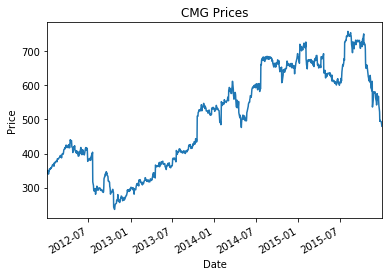

In [32]:
prices.plot();
# We still need to add the axis labels and title ourselves
plt.title(symbol + " Prices")
plt.ylabel("Price")
plt.xlabel("Date");

以及一些内置的描述性统计。我们可以单独计算这些值，也可以使用`describe()`方法。

In [33]:
print("Mean: ", prices.mean()) 
print("Standard deviation: ", prices.std()) 

Mean:  501.63665038880487
Standard deviation:  146.68873796090145


In [34]:
print("Summary Statistics") 
print(prices.describe()) 

Summary Statistics
count    1006.000000
mean      501.636650
std       146.688738
min       236.240005
25%       371.555000
50%       521.270020
75%       646.834991
max       757.770020
Name: CMG, dtype: float64


使用基本的数学运算符，我们可以很容易地用标量修改`Series`。

In [35]:
modified_prices = prices * 2 - 10
modified_prices.head(5)

Date
2012-01-03    672.539978
2012-01-04    687.500000
2012-01-05    690.960022
2012-01-06    687.900024
2012-01-09    669.479980
Name: CMG, dtype: float64

我们可以用基本的数学运算符来创建`Series`本身的线性组合。pandas将把匹配的指数组合起来，并按元素顺序进行计算，得出一个新的`序列`。

In [36]:
noisy_prices = prices + 5 * pd.Series(np.random.normal(0, 5, len(prices)), index=prices.index) + 20
noisy_prices.head(5)

Date
2012-01-03    388.934403
2012-01-04    343.862506
2012-01-05    392.201135
2012-01-06    402.916704
2012-01-09    352.867338
dtype: float64

然而，如果没有匹配的索引，我们可能会得到一个空的`序列`。

In [37]:
empty_series = prices + pd.Series(np.random.normal(0, 1, len(prices)))
empty_series.head(5)

2012-01-03   NaN
2012-01-04   NaN
2012-01-05   NaN
2012-01-06   NaN
2012-01-09   NaN
dtype: float64

与其研究时间序列本身，不如研究它的一阶差分或百分比变化(在我们的特定情况下，是为了获得加法或乘法回报率)。这两个都是内置方法。

In [38]:
add_returns = prices.diff()[1:]
mult_returns = prices.pct_change()[1:]

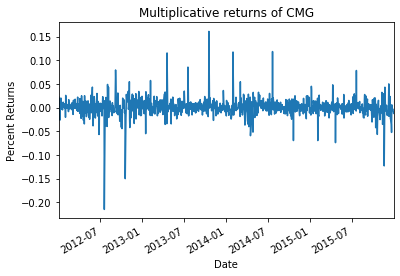

In [39]:
plt.title("Multiplicative returns of " + symbol)
plt.xlabel("Date")
plt.ylabel("Percent Returns")
mult_returns.plot();

pandas有方便的功能，也可以计算滚动的均值和标准差!

In [40]:
rolling_mean = prices.rolling(30).mean()
rolling_mean.name = "30-day rolling mean"

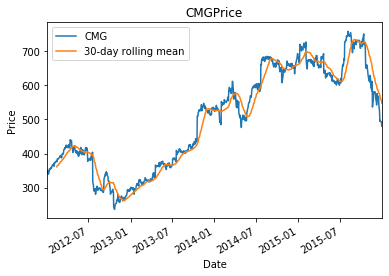

In [41]:
prices.plot()
rolling_mean.plot()
plt.title(symbol + "Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

In [42]:
rolling_std = prices.rolling(30).std()
rolling_std.name = "30-day rolling volatility"

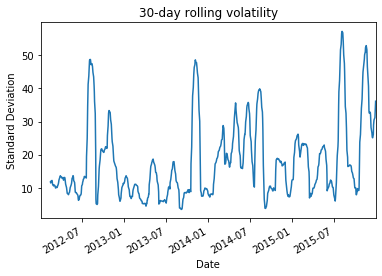

In [43]:
rolling_std.plot()
plt.title(rolling_std.name);
plt.xlabel("Date")
plt.ylabel("Standard Deviation");

许多NumPy函数将在`Series`上工作，就像它们在一维NumPy数组上工作一样。

In [44]:
print (np.median(mult_returns))

0.00023590204910717283


然而，这些函数中的大多数已经被直接实现为`Series`和`DataFrame`的方法。

In [45]:
print (mult_returns.median())

0.00023590204910717283


在任何情况下，由于性能的改进，使用内置的pandas方法都比在pandas数据结构上使用NumPy函数要好。在使用其他通用函数计算之前，一定要查看`Series`[文档](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html)。

### `DataFrames`

使用`Series`的许多方面都可以应用到`DataFrames`中。pandas的`DataFrames`允许我们通过其直观的结构轻松地管理我们的数据。

像`Series`一样，`DataFrames`可以保存多种类型的数据，但`DataFrames`是二维对象，不像`Series`。每个`DataFrames`都有一个index和一个cloumns属性，当我们实际开始处理一个对象时，我们将更深入地介绍这些属性。index属性类似于`Series`的index，不过遗憾的是，pandas中的索引有一些额外的特性，我们将无法在这里介绍。如果您对此感兴趣，可以查看关于高级索引的[pandas文档](http://pandas.pydata.org/pandas-docs/version/0.18.1/advanced.html)。columns属性提供了`DataFrames`的第二个维度，允许我们将指定的列(所有的列都是`Series`)组合成具有内聚力的对象，并将索引排成一列。

我们可以通过在字典或NumPy`ndarray`上调用`pandas.DataFrame()`来创建`DataFrame`。我们还可以使用`pandas.concat()`将一组pandas`Series`连接到`DataFrame`中。

In [46]:
dict_data = {
    'a' : [1, 2, 3, 4, 5],
    'b' : ['L', 'K', 'J', 'M', 'Z'],
    'c' : np.random.normal(0, 1, 5)
}
print (dict_data)

{'a': [1, 2, 3, 4, 5], 'b': ['L', 'K', 'J', 'M', 'Z'], 'c': array([-0.42455221, -1.58555495,  1.09685571,  1.40602683,  0.40421161])}


每个`DataFrame`都有几个我们需要记住的关键属性。第一个是index属性。我们可以很容易地包含`Timestamp`对象的索引，就像我们在`Series`中所做的那样。

In [47]:
frame_data = pd.DataFrame(dict_data, index=pd.date_range('2016-01-01', periods=5))
print (frame_data)

            a  b         c
2016-01-01  1  L -0.424552
2016-01-02  2  K -1.585555
2016-01-03  3  J  1.096856
2016-01-04  4  M  1.406027
2016-01-05  5  Z  0.404212


如前所述，我们可以将`Series`组合成`DataFrames`。像这样连接`Series`将根据相应的索引匹配元素。由于下面的`Series`没有分配索引，它们每个默认为一个整数索引。

In [48]:
s_1 = pd.Series([2, 4, 6, 8, 10], name='Evens')
s_2 = pd.Series([1, 3, 5, 7, 9], name="Odds")
numbers = pd.concat([s_1, s_2], axis=1)
print (numbers)

   Evens  Odds
0      2     1
1      4     3
2      6     5
3      8     7
4     10     9


稍后我们将再次使用`pandas.concat()`将多个`DataFrame`合并为一个。 

每个`DataFrame`还有一个`columns`属性。这些可以在我们调用`pandas.DataFrame`时分配,也可以像索引那样直接修改它们。请注意，当我们将上面的两个`Series`连接起来时，列名就是那些`Series`的名称。

In [49]:
print (numbers.columns)

Index(['Evens', 'Odds'], dtype='object')


要在对象创建后修改列，我们只需要做以下操作:

In [50]:
numbers.columns = ['Shmevens', 'Shmodds']
print (numbers)

   Shmevens  Shmodds
0         2        1
1         4        3
2         6        5
3         8        7
4        10        9


同样，`DataFrame`的索引也可以在事后更改。

In [51]:
print (numbers.index)

RangeIndex(start=0, stop=5, step=1)


In [52]:
numbers.index = pd.date_range("2016-01-01", periods=len(numbers))
print (numbers)

            Shmevens  Shmodds
2016-01-01         2        1
2016-01-02         4        3
2016-01-03         6        5
2016-01-04         8        7
2016-01-05        10        9


除了`DataFrame`的列和索引之外，我们还可以通过查看values属性直接访问它们包含的值。

In [53]:
numbers.values

array([[ 2,  1],
       [ 4,  3],
       [ 6,  5],
       [ 8,  7],
       [10,  9]], dtype=int64)

这将返回一个NumPy数组。

In [54]:
type(numbers.values)

numpy.ndarray

#### 访问`DataFrame`元素

在如何访问`DataFrame`的元素方面，我们又一次看到了`Series`中大量的结转。关键的症结在于现在所有的事情都必须考虑到多维度。这种情况发生的主要方式是通过访问`DataFrame`的列，可以是单独的，也可以是分组的。我们可以通过直接访问属性或使用我们已经熟悉的方法来做到这一点。

In [55]:
symbol = ["CMG", "MCD", "SHAK", "WFM"]
start = "2012-01-01"
end = "2016-01-01"
prices = data.get_data_yahoo(symbol, start, end)['Close']

这里我们直接访问`CMG`列。请注意，只有在列名中没有空格或不友好的字符时，这种访问方式才有效。

In [56]:
prices.CMG.head()

Date
2012-01-03    341.269989
2012-01-04    348.750000
2012-01-05    350.480011
2012-01-06    348.950012
2012-01-09    339.739990
Name: CMG, dtype: float64

我们还可以像这样使用`loc[]`来访问单个列。

In [57]:
prices.loc[:, 'CMG'].head()

Date
2012-01-03    341.269989
2012-01-04    348.750000
2012-01-05    350.480011
2012-01-06    348.950012
2012-01-09    339.739990
Name: CMG, dtype: float64

访问一个单独的列将返回一个`Series`，不管我们如何获取它。

In [58]:
print( type(prices.CMG))
print( type(prices.loc[:, 'CMG']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


注意到我们是如何将一个list传递到`loc[]`方法中的吗?这是访问`Series`和访问`DataFrame`之间的关键区别，其基础是`DataFrame`具有多个维度。当您将一个二维list传递给一个`DataFrame`时，list的第一个元素应用于行，第二个元素应用于列。因此，要分解它，上面的代码行告诉`DataFrame`返回标签为`'CMG'`的列的每一行。还支持列的列表。

In [59]:
prices.loc[:, ['CMG', 'MCD']].head()

Symbols,CMG,MCD
Date,,
2012-01-03,341.269989,98.839996
2012-01-04,348.750000,99.389999
2012-01-05,350.480011,99.830002
2012-01-06,348.950012,100.599998
2012-01-09,339.739990,99.639999


我们还可以使用`loc[]`通过索引值访问`DataFrame`,和`Series`类似。

In [60]:
prices.loc['2015-12-15':'2015-12-22']

Symbols,CMG,MCD,SHAK,AMZN
Date,,,,
2015-12-15,554.859985,116.930000,41.580002,658.640015
2015-12-16,567.830017,117.839996,40.169998,675.770020
2015-12-17,554.890015,117.500000,38.540001,670.650024
2015-12-18,541.080017,116.660004,39.750000,664.140015
2015-12-21,522.010010,117.690002,38.189999,664.510010
2015-12-22,494.609985,117.720001,39.750000,663.150024


这与列的列表也配合得很好。

In [61]:
prices.loc['2015-12-15':'2015-12-22', ['CMG', 'MCD']]

Symbols,CMG,MCD
Date,,
2015-12-15,554.859985,116.930000
2015-12-16,567.830017,117.839996
2015-12-17,554.890015,117.500000
2015-12-18,541.080017,116.660004
2015-12-21,522.010010,117.690002
2015-12-22,494.609985,117.720001


使用`iloc[]`的工作方式也类似，允许您通过整数索引访问`DataFrame`的各个部分。

In [62]:
prices.iloc[0:2, 1]

Date
2012-01-03    98.839996
2012-01-04    99.389999
Name: MCD, dtype: float64

In [63]:
# Access prices with integer index in
# [1, 3, 5, 7, 9, 11, 13, ..., 99]
# and in column 0 or 3
prices.iloc[[1, 3, 5] + list(range(7, 100, 2)), [0, 3]].head(20)

Symbols,CMG,AMZN
Date,,
2012-01-04,348.750000,177.509995
2012-01-06,348.950012,182.610001
2012-01-10,341.119995,179.339996
2012-01-12,347.619995,175.929993
2012-01-17,353.380005,181.660004
2012-01-19,358.089996,194.449997
2012-01-23,360.459991,186.089996
2012-01-25,363.140015,187.800003
2012-01-27,366.760010,195.369995


#### 布尔索引

与`Series`一样，有时我们希望根据一组标准过滤`DataFrame`。我们通过使用布尔值索引`DataFrame`来做到这一点。

In [65]:
prices.loc[prices.MCD < prices.AMZN].head()

Symbols,CMG,MCD,SHAK,AMZN
Date,,,,
2012-01-03,341.269989,98.839996,NaN,179.029999
2012-01-04,348.750000,99.389999,NaN,177.509995
2012-01-05,350.480011,99.830002,NaN,177.610001
2012-01-06,348.950012,100.599998,NaN,182.610001
2012-01-09,339.739990,99.639999,NaN,178.559998


我们可以通过再次使用逻辑运算符`&`、`|`和`~`(分别是and、or和not)来添加多个布尔条件!

In [66]:
prices.loc[(prices.MCD < prices.AMZN) & ~prices.SHAK.isnull()].head()

Symbols,CMG,MCD,SHAK,AMZN
Date,,,,
2015-01-30,709.840027,92.440002,45.900002,354.529999
2015-02-02,712.549988,92.510002,43.990002,364.470001
2015-02-03,726.630005,93.919998,44.980000,363.549988
2015-02-04,676.000000,94.050003,41.320000,364.750000
2015-02-05,670.909973,94.339996,42.639999,373.890015


#### 添加、删除列，组合`DataFrames` /`Series`

当您已经有了一个`DataFrame`来填充数据时，这一切都很好，但是能够将数据添加到已有的数据中也很重要。

我们只需将数据分配给不存在的列，就可以添加新列。这里我们用`loc[:，'COL_NAME']`表示法，并存储`DataReader()`的输出(如果我们只传递一个安全性，它将返回一个pandas`Series`)。这是我们用来将`Series`添加到现有`DataFrames`中的方法。

In [67]:
s_1 = data.get_data_yahoo('TSLA', start, end)['Close']
prices.loc[:, 'TSLA'] = s_1
prices.head(5)

Symbols,CMG,MCD,SHAK,AMZN,TSLA
Date,,,,,
2012-01-03,341.269989,98.839996,NaN,179.029999,28.080000
2012-01-04,348.750000,99.389999,NaN,177.509995,27.709999
2012-01-05,350.480011,99.830002,NaN,177.610001,27.120001
2012-01-06,348.950012,100.599998,NaN,182.610001,26.910000
2012-01-09,339.739990,99.639999,NaN,178.559998,27.250000


删除一个列也同样容易。

In [68]:
prices = prices.drop('TSLA',axis=1)
prices.head(5)

Symbols,CMG,MCD,SHAK,AMZN
Date,,,,
2012-01-03,341.269989,98.839996,NaN,179.029999
2012-01-04,348.750000,99.389999,NaN,177.509995
2012-01-05,350.480011,99.830002,NaN,177.610001
2012-01-06,348.950012,100.599998,NaN,182.610001
2012-01-09,339.739990,99.639999,NaN,178.559998


如果我们想要将多个`DataFrame`合并为一个，我们使用`pandas.concat()`方法.

In [69]:
df_1 = data.get_data_yahoo(['SPY', 'VXX'], start, end)['Close']
df_2 = data.get_data_yahoo(['MSFT', 'AAPL', 'GOOG'], start, end)['Close']
df_3 = pd.concat([df_1, df_2], axis=1)
df_3.head()

D:\Anaconda3\lib\site-packages\pandas_datareader\base.py:270: SymbolWarning: Failed to read symbol: 'VXX', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


Symbols,SPY,VXX,MSFT,AAPL,GOOG
Date,,,,,
2012-01-03,127.500000,NaN,26.770000,58.747143,331.462585
2012-01-04,127.699997,NaN,27.400000,59.062859,332.892242
2012-01-05,128.039993,NaN,27.680000,59.718571,328.274536
2012-01-06,127.709999,NaN,28.110001,60.342857,323.796326
2012-01-09,128.020004,NaN,27.740000,60.247143,310.067780


#### 缺失的数据(再一次)
将现实生活中的数据导入`DataFrame`会给我们带来与`Series`中相同的问题，只不过这次是在更多的维度上。我们可以使用与`Series`相同的方法，如下所示。

In [70]:
filled0_prices = prices.fillna(0)
filled0_prices.head(5)

Symbols,CMG,MCD,SHAK,AMZN
Date,,,,
2012-01-03,341.269989,98.839996,0.0,179.029999
2012-01-04,348.750000,99.389999,0.0,177.509995
2012-01-05,350.480011,99.830002,0.0,177.610001
2012-01-06,348.950012,100.599998,0.0,182.610001
2012-01-09,339.739990,99.639999,0.0,178.559998


In [71]:
bfilled_prices = prices.fillna(method='bfill')
bfilled_prices.head(5)

Symbols,CMG,MCD,SHAK,AMZN
Date,,,,
2012-01-03,341.269989,98.839996,45.900002,179.029999
2012-01-04,348.750000,99.389999,45.900002,177.509995
2012-01-05,350.480011,99.830002,45.900002,177.610001
2012-01-06,348.950012,100.599998,45.900002,182.610001
2012-01-09,339.739990,99.639999,45.900002,178.559998


但是，在这种情况下(因为我们仍然在使用时间序列数据，一次处理多个时间序列)，最好的选择仍然是删除丢失的值。

In [72]:
dropped_prices = prices.dropna()
dropped_prices.head(5)

Symbols,CMG,MCD,SHAK,AMZN
Date,,,,
2015-01-30,709.840027,92.440002,45.900002,354.529999
2015-02-02,712.549988,92.510002,43.990002,364.470001
2015-02-03,726.630005,93.919998,44.980000,363.549988
2015-02-04,676.000000,94.050003,41.320000,364.750000
2015-02-05,670.909973,94.339996,42.639999,373.890015


#### 时间序列分析

使用`DataFrames`的内置统计方法，我们可以一次执行多个时间序列的计算!在`DataFrames`上执行计算的代码与上面`Series`中使用的方法几乎完全相同，所以不必担心重新学习所有内容。

`plot()`方法在这里又出现了一次，这一次它具有一个内置的图例，该图例对应于您正在绘图的列的名称。

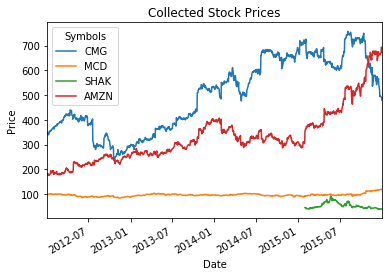

In [73]:
prices.plot()
plt.title("Collected Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date");

我们与`Series`交互产生的相同统计函数在这里通过添加`axis`参数重新浮出水面。通过指定`axis`，我们告诉pandas沿着列(`axis=0`)或行(`axis=1`)计算所需的函数。我们可以很容易地计算每一列的均值，如下所示:

In [74]:
prices.mean(axis=0)

Symbols
CMG     501.636650
MCD      96.621600
SHAK     53.575708
AMZN    332.478708
dtype: float64

以及标准差:

In [75]:
prices.std(axis=0)

Symbols
CMG     146.688738
MCD       5.714226
SHAK     11.968587
AMZN    112.295348
dtype: float64

同样，`describe()`函数将为我们提供数据的汇总统计信息，如果我们希望以一种方便的可视化方式显示所有典型的统计信息，而不是单独计算它们的话。

In [76]:
prices.describe()

Symbols,CMG,MCD,SHAK,AMZN
count,1006.000000,1006.000000,233.000000,1006.000000
mean,501.636650,96.621600,53.575708,332.478708
std,146.688738,5.714226,11.968587,112.295348
min,236.240005,84.050003,38.189999,175.929993
25%,371.555000,93.672499,44.119999,257.915009
50%,521.270020,96.290001,49.270000,310.039993
75%,646.834991,99.137499,61.669998,375.140015
max,757.770020,120.070000,92.860001,693.969971


我们可以在`DataFrame`中扩展并添加标量，正如您在处理`Series`之后可能会怀疑的那样。这也是明智的做法。

In [77]:
(2 * prices - 50).head(5)

Symbols,CMG,MCD,SHAK,AMZN
Date,,,,
2012-01-03,632.539978,147.679993,NaN,308.059998
2012-01-04,647.500000,148.779999,NaN,305.019989
2012-01-05,650.960022,149.660004,NaN,305.220001
2012-01-06,647.900024,151.199997,NaN,315.220001
2012-01-09,629.479980,149.279999,NaN,307.119995


在这里，我们使用`pct_change()`方法来获得我们正在查看的证券乘法回报的`DataFrame`。

In [78]:
mult_returns = prices.pct_change()[1:]
mult_returns.head()

Symbols,CMG,MCD,SHAK,AMZN
Date,,,,
2012-01-04,0.021918,0.005565,NaN,-0.008490
2012-01-05,0.004961,0.004427,NaN,0.000563
2012-01-06,-0.004365,0.007713,NaN,0.028152
2012-01-09,-0.026394,-0.009543,NaN,-0.022178
2012-01-10,0.004062,0.000602,NaN,0.004368


如果我们使用统计方法来标准化收益，这是检查数据时的一个常见步骤，那么我们就可以更好地了解它们是如何在相同的范围内相对移动的。

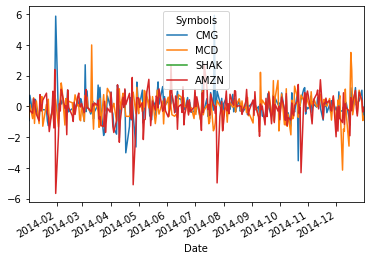

In [79]:
norm_returns = (mult_returns - mult_returns.mean(axis=0))/mult_returns.std(axis=0)
norm_returns.loc['2014-01-01':'2015-01-01'].plot();

这使得比较我们的例子中包含的不同时间序列的运动更容易。

轧制方法和标准偏差也适用于`DataFrame`。

In [80]:
rolling_mean =prices.rolling(30).mean()
rolling_mean.columns = prices.columns

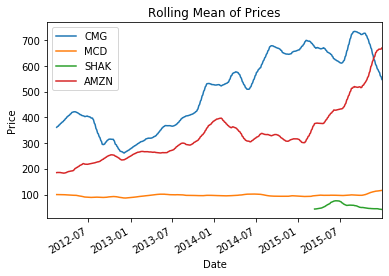

In [81]:
rolling_mean.plot()
plt.title("Rolling Mean of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

要查看`DataFrame`中内置的所有方法的完整列表，请查看[文档](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)。

# 下一步

当您处理pandas时，管理数据变得容易得多，尽管这只是一个非常一般的介绍。包中还有更多的工具，当您试图让数据做您想做的事情时，您可能会发现这些工具。如果您想要了解更多关于pandas的附加功能，请查看[文档](http://pandas.pydata.org/pandas-docs/stable/)。